## HR Analysis

#### Business scenario and problem 

* The HR department at Salifort Motors is looking to implement initiatives to enhance employee satisfaction within the company
* The main aproach of this problem is to predict employees that are likely to quit, and what contributes to their leaving. 

#### Key objectives and purpose of HR analysis

* Undestand and describe certain factors of why employees may leave the company 
* View relationships between variables and how one can cause of explain another
* View if maybe the company is having managment issues

#### Business Question 

* What are the factors that lead employees to leave the company?

Cleaning Data 

In [2]:
# Import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Python\Maven Analytics\HR_comma_sep.csv")
pd.set_option('display.max_columns', None)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### View inconsistencies and errors in the data 

In [4]:
df = df.rename(columns={'Work_accident' : 'work_accident', 'average_montly_hours' : 'average_monthly_hours', 'Department' : 'department'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
df[df.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


*  Since there are serveral continuous variables in the 10 columns of the DataFrame, it is unlikely that two employees would have exactly the same data. So we can dropped this columns.

In [7]:
df1 = df.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='time_spend_company'>

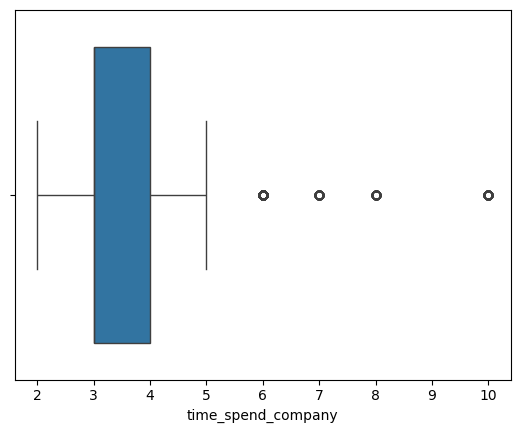

In [8]:
sns.boxplot(data= df1, x = 'time_spend_company')

* Using boxplots is the best aproach to visualize this type of distributions 

In [9]:
percentile25 = df1['time_spend_company'].quantile(0.25)
percentile75 = df1['time_spend_company'].quantile(0.75)

In [10]:
irq = percentile75 - percentile25

In [11]:
min_limit = percentile25 - 1.5*irq
max_limit = percentile75 + 1.5*irq

In [12]:
outliers = df1[(df1['time_spend_company'] > max_limit) | (df1['time_spend_company'] < min_limit)]
print("The number of outliers in 'time_spend_company' column is :", len(outliers))

The number of outliers in 'time_spend_company' column is : 824


* Using percentiles is one of the best ways to found outilers
* The data that fall over the min_limit or under the max_limit is considered an outiler 

In [13]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
# Taking a look of percentage distribution of whether an employee left or no 
df1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

-- Making two plots such as boxplots and hisplots are going to show a better view of the distribution of people who left vs not 

-- Comparing variables such as average monhtly hours and number of proyects is going to be good indicators 

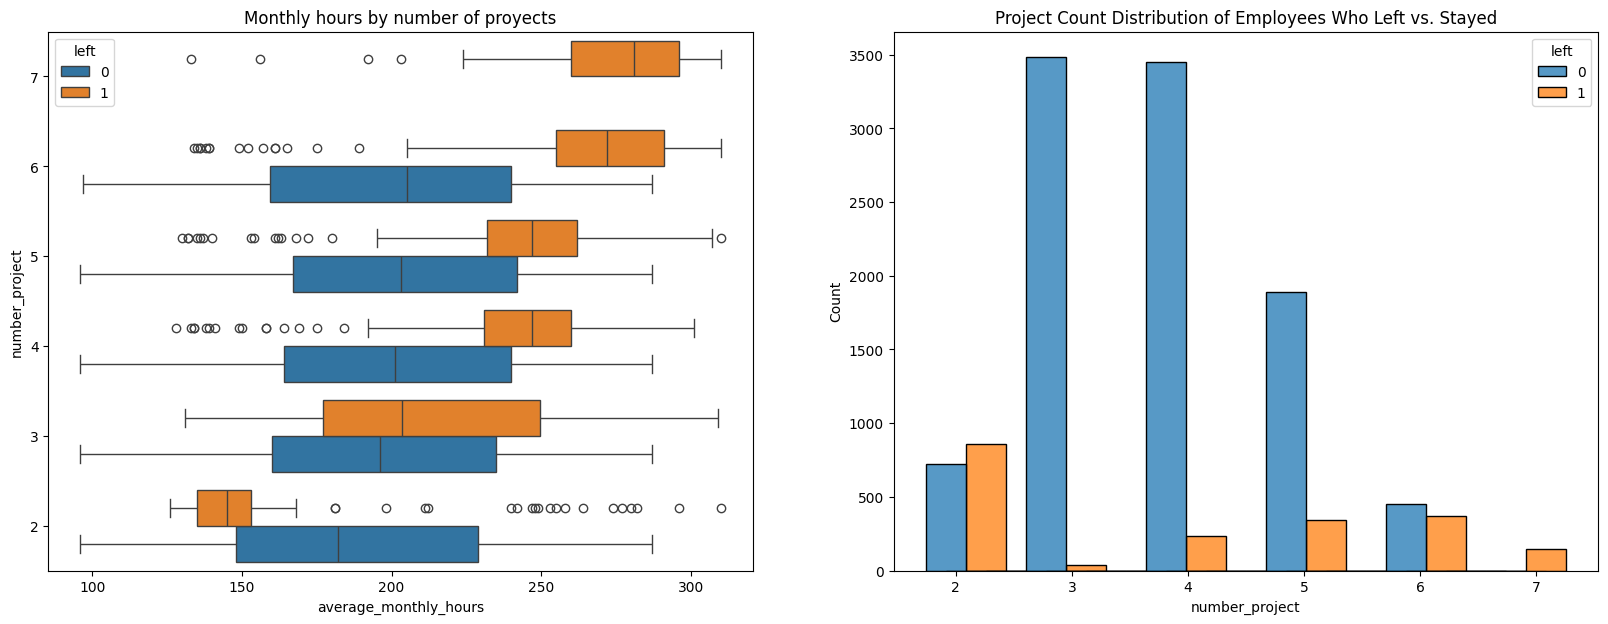

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (20,7))
sns.boxplot(data=df1 , x= 'average_monthly_hours', y = 'number_project', hue='left', orient= 'h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of proyects')

sns.histplot(data=df1, x='number_project', hue= 'left', ax= ax[1],  multiple= 'dodge', shrink= 4)
ax[1].set_title('Project Count Distribution of Employees Who Left vs. Stayed')
plt.show()

In [16]:
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

 #####  We have two type of scenarios of employees who left the company 
- One group that worked considerably less than his coworkers
  
  * This could be employees that were fired or even employees already notified of their departure therefore assigned fewer working hours.

- Another group that worked more intensely

  * This could be employees that quit 

#### Key observations

  * We can see that people who worked in 7 projects all left the company 
  * And also we can said that the optimal number of projects for employees could be 3 to 4 , based on the distribution of projects among employees who left versus those who stayed
 

-- Now we are going to take a look with the help of an scatterplot to show the correlation between average monthly hours vs satisfaction level based on whether an employee left or no

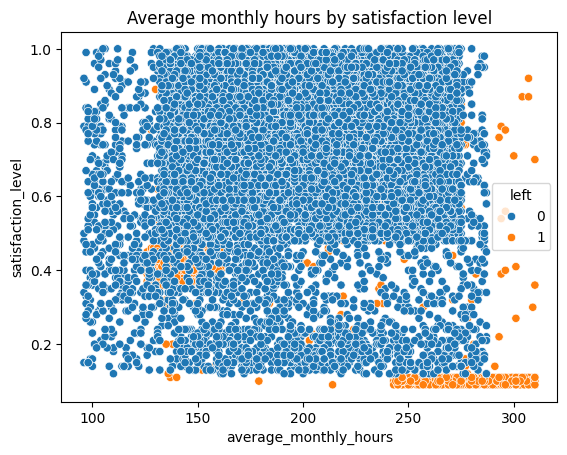

In [24]:
sns.scatterplot(data=df1 , x= 'average_monthly_hours', y= 'satisfaction_level', hue= 'left')
plt.title('Average monthly hours by satisfaction level')
plt.show()

 #####  We have 3 types of groups 
- One group that worked 240-315 hours per month, giving a satisfaction level of zero
  
  * This makes sense , because within this range practically employees are working to 60-75 hours per week, so problably this is related to their satisfaction level

- Another group that have normal working hours and satisfactions levels around 0.4

  * Maybe this can be explained, given that there is some people that are working more hours and this could lead to some tension for those who work less hours, feeling a need to work more. 

- Finally their is a third group that works around 250-300 hours, giving a satisfaction level between 0.7 and 0.9 

-- This means that their is a strange distribution of the data, therefore it could lead to data manipulation

-- Now working again with boxplots and hisplots are going to show a better view of the distribution of people who left vs not 

-- Comparing variables such as satisfaction level and time spend on the company could be good indicators 

Text(0.5, 1.0, 'Employee time spend Distribution: Departed vs Retained')

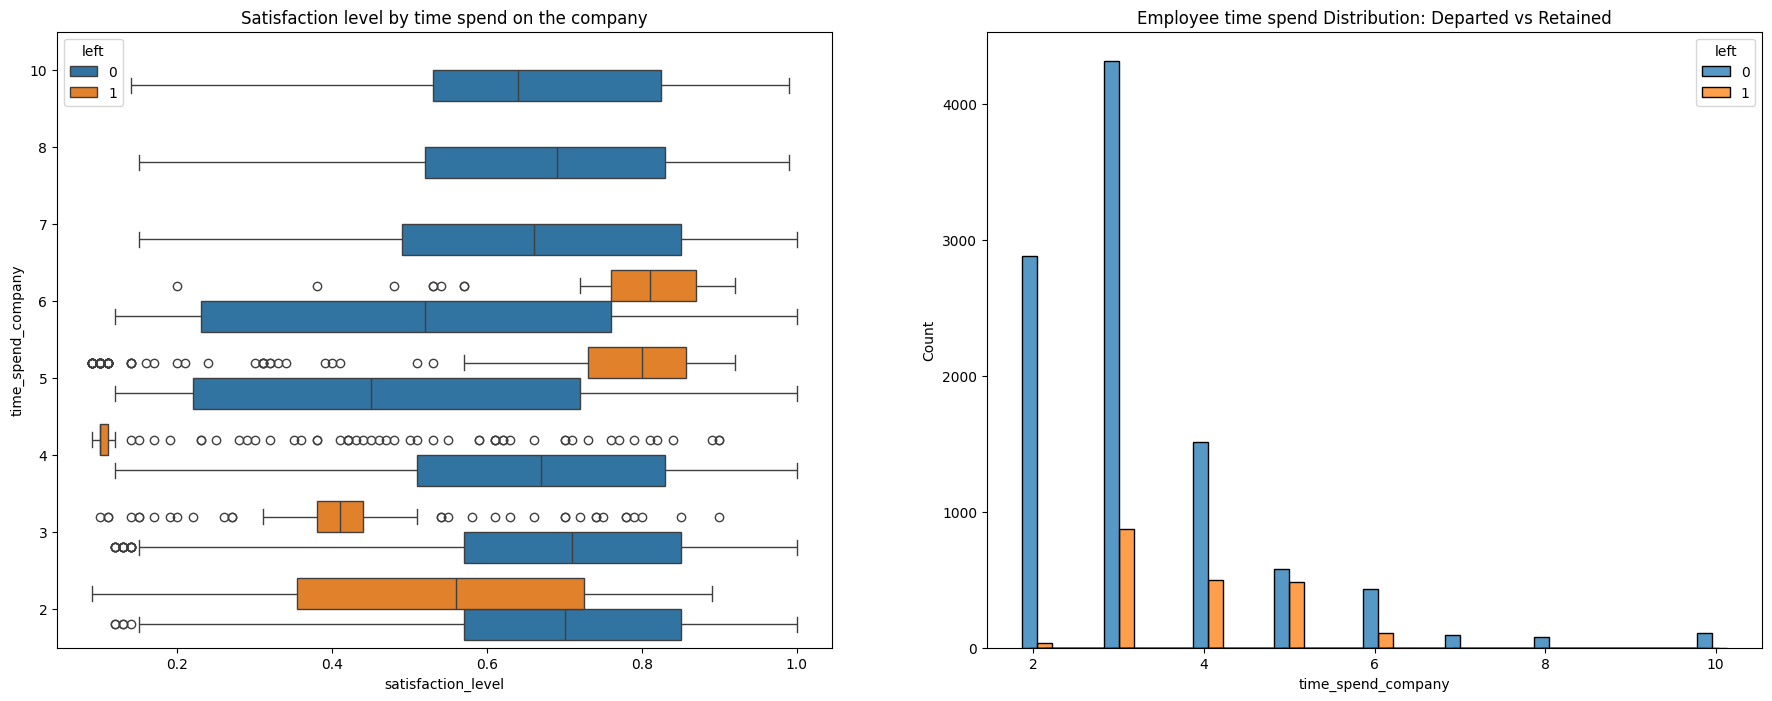

In [18]:
fig, ax = plt.subplots(1,2 , figsize= (22,8))

sns.boxplot(data= df1, x= 'satisfaction_level', y= 'time_spend_company', hue= 'left', ax=ax[0], orient= 'h')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by time spend on the company')

sns.histplot(data= df1, x='time_spend_company', hue= 'left', multiple= 'dodge', shrink= 4, ax=ax[1])
ax[1].set_title('Employee time spend Distribution: Departed vs Retained')

##### Employees who departed can be classified into two broad categories

   * Employees who felt dissatisfied and therefore did not last long in the company 
   * Employees who felt satisfied and has been with the company for a few years now

#### Key observations
 
   * Employees who have been with the company for 7 to 10 years generally do not leave
      
      * Probably this is people that are in a greater range than other 
   * Four-year employees who left, left with low satisfaction levels , this could be related to some company policy that didn't work for some employees 

In [19]:
short_time = df1[df1['time_spend_company'] < 7]
long_time = df1[df1['time_spend_company'] > 6 ]

People with more years of work tend to have very high paid salaries?

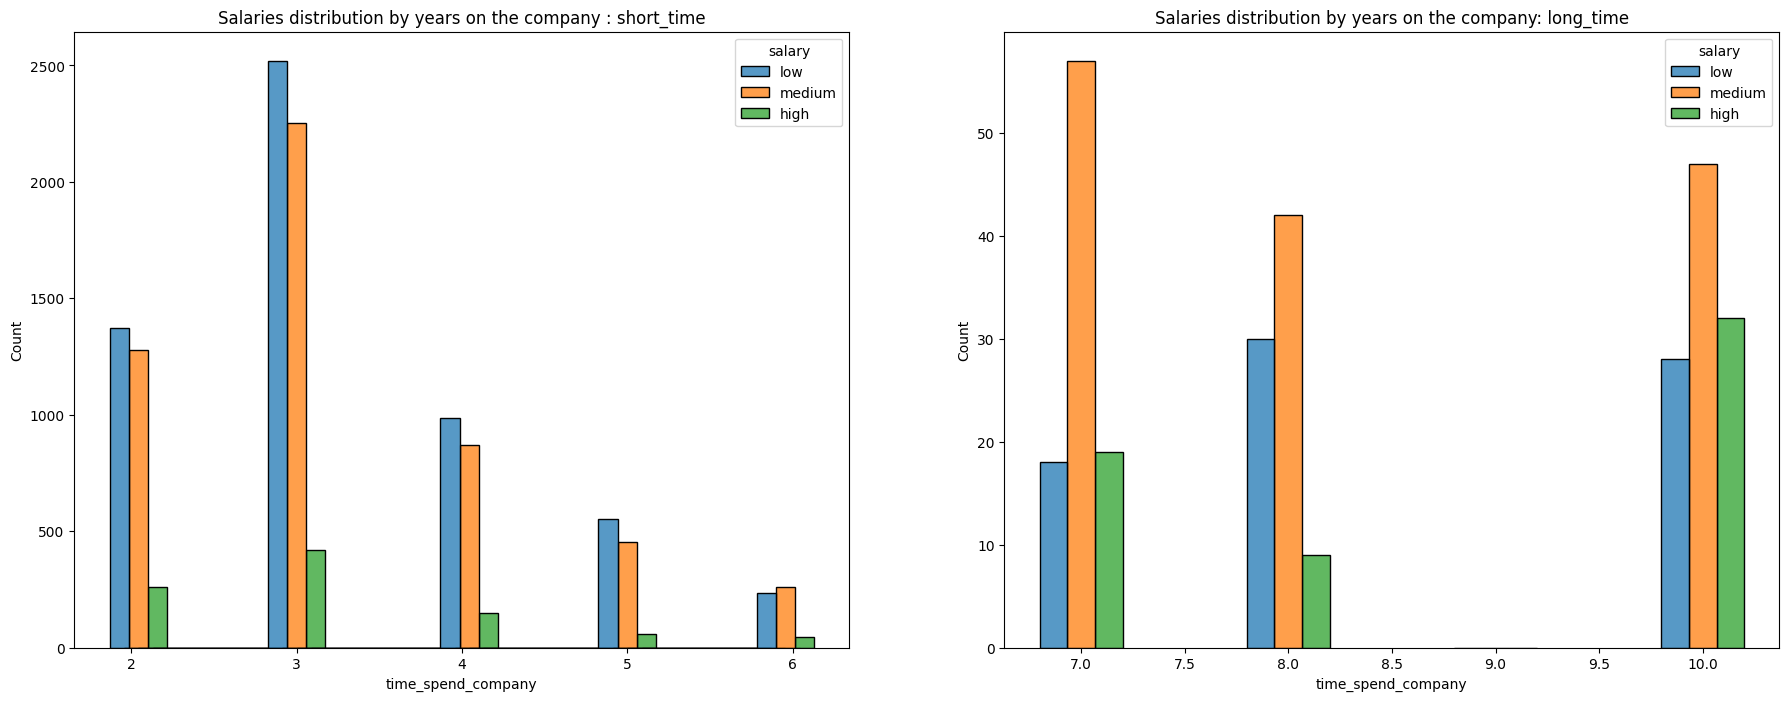

In [20]:
fig, ax = plt.subplots(1, 2, figsize= (22,8))

sns.histplot(data= short_time, x='time_spend_company', hue= 'salary', hue_order= ['low', 'medium', 'high'], multiple= 'dodge', shrink= 4, ax= ax[0])
ax[0].set_title('Salaries distribution by years on the company : short_time')

sns.histplot(data= long_time, x='time_spend_company', hue= 'salary', hue_order= ['low', 'medium', 'high'], multiple= 'dodge', shrink= .4, discrete=1, ax= ax[1])
ax[1].set_title('Salaries distribution by years on the company: long_time')
plt.show()

There is not a strong indicative that people with more experience tends to have a higher paid salary.

Does employee turnover change between departments ?

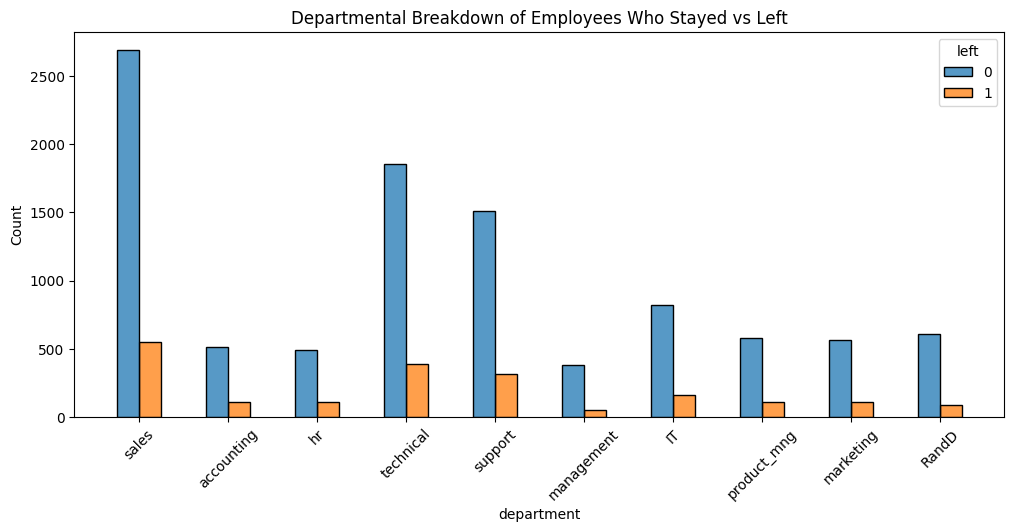

In [21]:
plt.figure(figsize= (12,5))
sns.histplot(data= df1, x= 'department', hue= 'left', hue_order= [0,1], multiple= 'dodge', shrink= .5, discrete=1)
plt.xticks(rotation = 45)
plt.title('Departmental Breakdown of Employees Who Stayed vs Left')
plt.show()

Employee turnover seems consistent across deparments 

In [22]:
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

The size of the sales department might explain the slight difference in employee turnover between departments 

Text(0.5, 1.0, 'Correlation Heatmap')

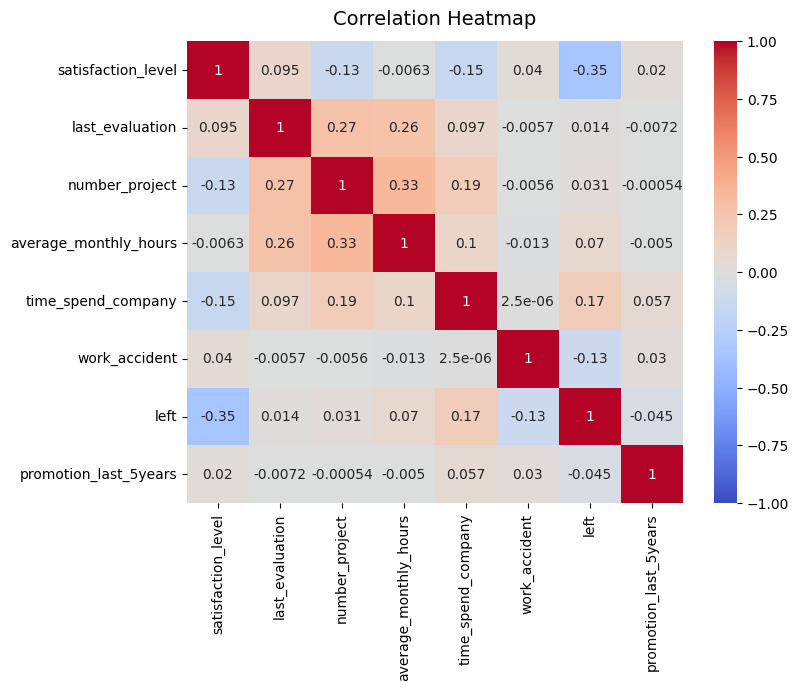

In [25]:
plt.figure(figsize= (8,6))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap= 'coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

* It seems that number of projects, average_monthly_hours and satisfaction_level are positive correlated with each other.  

* There is a strongly negative correlation between average_monthly_hours and promotions, indicating that employees who worked more hours do not necessarily receive more promotions 

#### General conclusions 

* The company appears to be facing issues with ineffective management.

* Employees working on 6 to 7 proyects are more likely to leave the company.

* It seems that despite working more hours, promotions are not given.

* Employees with more than 6 years on the company are more likely to not leave the company.